In [1]:
# Steps of analysis:
# 1. Data Understanding
# 2. Data Wrangling
# 3. Data Visualization and Analysis
# 4. Conclusion

### Initial Import of Libraries

In [3]:
#importing necessary Libraries 
import pandas as pd 
import numpy as np 
#Data visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load of loan data and data dictionary
loan = pd.read_csv('loan.csv')
loan_dd = pd.read_excel('Data_Dictionary.xlsx')
# Initial smoke test
print(loan.shape)
print(loan.info())
print(loan.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### Duplicate checks

In [5]:
# Checking for duplicate rows in dataset based on column id

print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

39717


Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, ...]
Index: []

[0 rows x 111 columns]

### Setting Dataframe display options

In [6]:
#Removal of display limits of dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

### Test of data in Loan and dictinary tables

In [7]:
# Printing of first 5 rows
loan_dd.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [9]:
# Printing of first 5 rows
print(loan.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status i

### Initial information and feel of data

In [10]:

print('Columns:',loan.shape[1])
print('Rows:',loan.shape[0])
## missing values
print('Missing values:',loan.isnull().sum().sum())
## unique values
print('Unique values:',loan.nunique().sum())
## duplicates
print('Duplicates:',loan.duplicated().sum())

Columns: 111
Rows: 39717
Missing values: 2263364
Unique values: 416801
Duplicates: 0


In [11]:
# Infomation on dataframe
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [12]:
# Data types for individual columns
print(loan.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [13]:
# Describe the data set Loan file
print(loan.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [14]:
# Display of Columns
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Cleansing of null value in both columns and rows

In [16]:
## validate missing values
print(loan.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [17]:
# validating column for null values(in % ) and non relavant column
print((loan.isnull().sum()/loan.shape[0]*100).round(2).sort_values(ascending=False))

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
avg_cur_bal                   100.0
                              ...  
pub_rec                         0.0
open_acc                        0.0
inq_last_6mths                  0.0
earliest_cr_line                0.0
id                              0.0
Length: 111, dtype: float64


In [16]:
# Checking columns again for null value percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [18]:
# Delete columns where 50% or more null values 
loan = loan.loc[:,loan.isnull().sum()/loan.shape[0]*100<50]
print(loan.shape)

(39717, 54)


In [19]:
# Print Columns post deletion
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [20]:
# validation of Rows for missing values
print((loan.isnull().sum(axis=1)).max())

6


### Removing the irrelevant columns

In [21]:
# removla of additonal columns where we dont need for this project analysis
loan=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
loan=loan.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code 
loan=loan.drop(['zip_code'],axis=1)
# Removing member_id
loan=loan.drop(['member_id'],axis=1)
# Removing funded_amnt_inv 
loan=loan.drop(['funded_amnt_inv'],axis=1)
# Shape oof the new dataset
print(loan.shape)

(39717, 26)


In [22]:
# examining of columns for relevant data with unique values
print(loan.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [24]:
# delete not relevant column which contain one unique value
loan = loan.loc[:,loan.nunique()>1]
# Shape of the dataframe after removing columns
print(loan.shape)

(39717, 18)


In [25]:
# final set of Columns in dataset
print(loan.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


### Deletion and solving the null values cases

In [26]:
# verification of missing values in loan data
print(loan.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
dti                        0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
loan_amnt                  0
id                         0
dtype: int64


The above data has columns with null values which can be removed or derived based on the column

In [29]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


In [30]:
# check the status of the loan as this is important to ignore certain statuses
(loan.loan_status.value_counts()*100)/len(loan)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [34]:
# obseravation of values in pub_rec_bankruptcies column
print(loan.pub_rec_bankruptcies.value_counts())

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [33]:
# deletion of null values in columns emp_title and emp_length columns
loan = loan.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan.shape)

(38642, 18)


As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [36]:
# mainly determing the consistency of data where 0 is maintained for all numerical fields
loan.pub_rec_bankruptcies.fillna(0,inplace=True)

In [38]:
# re check for null values in datasets
print(loan.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [40]:
# Shape of the dataframe
print(loan.shape)

(38642, 18)


###  New Columns value derivation

In [41]:

print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state         

In [53]:

## Derving more columns with the conversion of data type

loan.purpose=loan.purpose.astype('category')
loan.addr_state=loan.addr_state.astype('category')

In [55]:
# adding new colums year and month based on the date available in the dataset
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['year']=loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month

loan.head()

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   
1  1077430       2500         2500    60     15.27        59.83     C   
2  1077175       2400         2400    36     15.96        84.33     C   
3  1076863      10000        10000    36     13.49       339.31     C   
5  1075269       5000         5000    36      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   
1        C4         0.5           RENT     30000.0     Source Verified   
2        C5        10.0           RENT     12252.0        Not Verified   
3        C1        10.0           RENT     49200.0     Source Verified   
5        A4         3.0           RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
5 2011-12-01   Fully Paid         wedding         AZ  11.20   

   pub_rec_bankruptcies  issue_year  issue_month  year  month  
0                   0.0        2011           12  2011     12  
1                   0.0        2011           12  2011     12  
2                   0.0        2011           12  2011     12  
3                   0.0        2011           12  2011     12  
5                   0.0        2011           12  2011     12

In [56]:
# Setting decimal point limit for all data 
for x in loan.columns:
    if(loan[x].dtype=='float64'):
      loan[x]=loan[x].round(2)
      
loan.head(1)

id  loan_amnt  funded_amnt  term  int_rate  installment grade  \
0  1077501       5000         5000    36     10.65       162.87     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2        10.0           RENT     24000.0            Verified   

     issue_d loan_status      purpose addr_state    dti  pub_rec_bankruptcies  \
0 2011-12-01  Fully Paid  credit_card         AZ  27.65                   0.0   

   issue_year  issue_month  year  month  
0        2011           12  2011     12

In [57]:
# drop loans data  with status 'Current'
loan = loan[loan.loan_status!='Current']
print(loan.shape)

(37544, 22)


Completion of Data Cleansing

In [59]:
# new columns required

loan = loan[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','year','month']]
loan.shape

(37544, 17)

In [60]:
# Data segregation as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','year','month']
id_cols=['id']
result_cols=['loan_status']

### Identifying and droping the outliers

In [65]:
## loan_amnt Plotly is an interactive graph
px.box(loan,x='loan_amnt',width=600,height=300,title='Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

In [66]:
## starting with int_rate
px.box(loan,x='int_rate',width=600,height=300,title='Interest Rate',labels={'int_rate':'Interest Rate'}).show()


In [84]:
## annual income of the lendee
px.box(loan,x='annual_inc',width=600,height=300,title='Annual Income of the lendee',labels={'annual_inc':'Annual Income'}).show()


In [85]:

## based on the above annual income , we can drop the lendee who are outliers
loan = loan[loan.annual_inc<=np.percentile(loan.annual_inc,99)]

In [86]:
## annual income of the lendee
px.box(loan,x='annual_inc',width=600,height=300,title='Annual Income of the lendee(Outliers Removed)',labels={'annual_inc':'Income'}).show()


In [79]:
# Debt to income Ratio
px.box(loan,x='dti',width=600,height=300,title='Debt To Income Ratio',labels={'dti':'DTI '}).show()


### Univariate Analysis

Fully Paid     85.516259
Charged Off    14.483741
Name: loan_status, dtype: float64


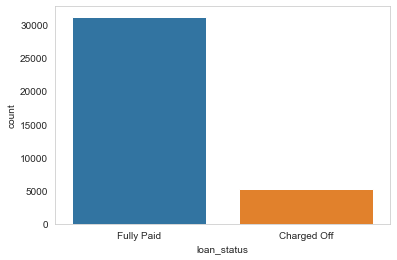

In [88]:
#
print(loan.loan_status.value_counts()*100/loan.loan_status.count())
# 0=Fully Paid, 1=Charged Off
ax=sns.countplot(loan.loan_status)
plt.show()

***Observation:*** charged off (Defaulted) loan are low in numbers compared to Fully Paid.


In [96]:
# Loan Amount
print(loan.loan_amnt.describe())

count    36503.000000
mean     10906.361121
std       7177.974099
min        500.000000
25%       5275.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [100]:
# loan duration
print(loan.term.value_counts()*100/loan.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan.term)
plt.show()

36    75.470509
60    24.529491
Name: term, dtype: float64


***Observation***: majority of the loan tenure is for 36 months and few loans are for 60 month duration

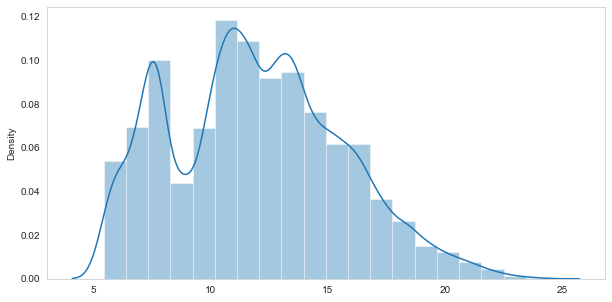

In [102]:
#  interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan.int_rate),kde=True,bins=20)
plt.show()

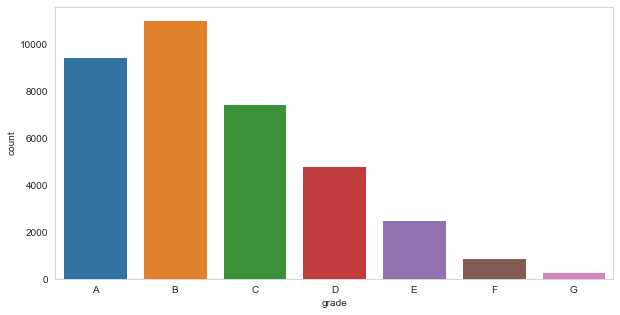

In [103]:
# Grade
plt.figure(figsize=(10,5))
sns.countplot(loan.grade)
plt.show()

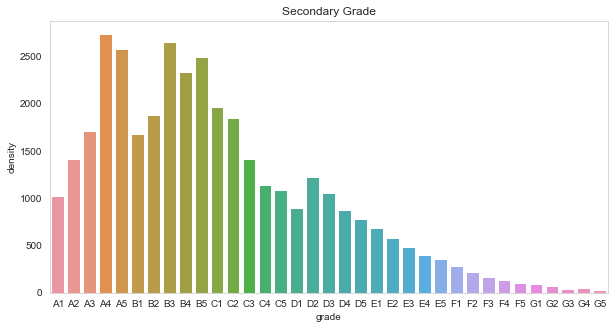

In [105]:
# Grade countplot
plt.figure(figsize=(10,5))
sns.countplot(loan.sub_grade)
plt.xlabel('grade')
plt.ylabel('density')
plt.title('Secondary Grade')
plt.show()

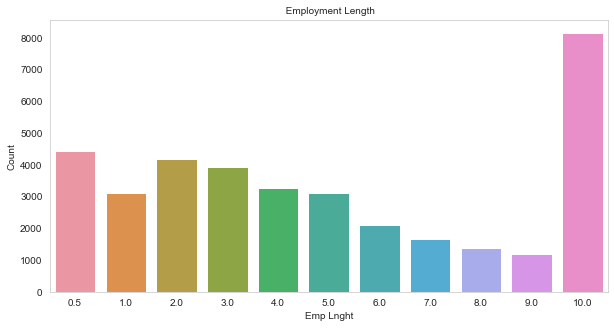

In [107]:
# Count of Employement lenght
plt.figure(figsize=(10,5))
sns.countplot(loan.emp_length)
plt.xlabel('Emp Lnght')
plt.ylabel('Count')
plt.title(' Employment Length',fontsize=10)
plt.show()

***Observation***: More Lendees have work experience more than 10 yrs

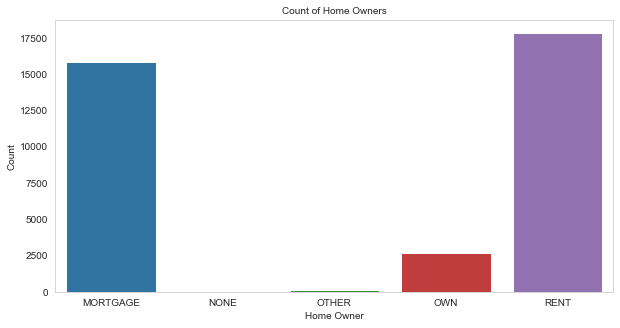

In [108]:
# Home owners
plt.figure(figsize=(10,5))
sns.countplot(loan.home_ownership)
plt.xlabel('Home Owner')
plt.ylabel('Count')
plt.title('Count of Home Owners',fontsize=10)
plt.show()

***Observation***: Majority are in rented houses or in mortagages with few own

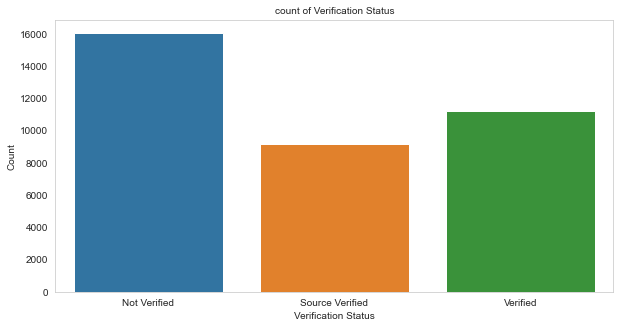

In [109]:
# verification status
plt.figure(figsize=(10,5))
sns.countplot(loan.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('count of Verification Status',fontsize=10)
plt.show()

***Observation***: data is distributed here with not verified is more and a combined of verified and source verified put together is more 

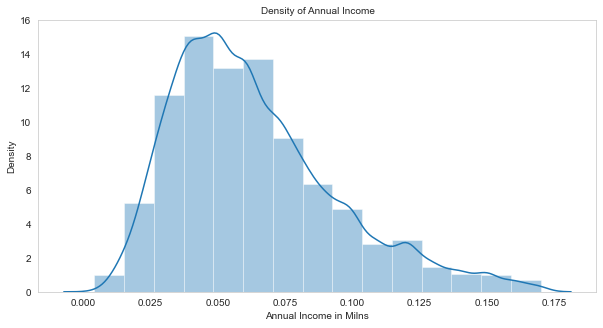

In [110]:
# Annual income
plt.figure(figsize=(10,5))
sns.distplot(loan.annual_inc/1000000,kde=True,bins=15)
plt.xlabel('Annual Income in Milns')
plt.ylabel('Density')
plt.title('Density of Annual Income',fontsize=10)
plt.show()

***Observation***:Annual Income in the sample population is not distributed but is right skewed

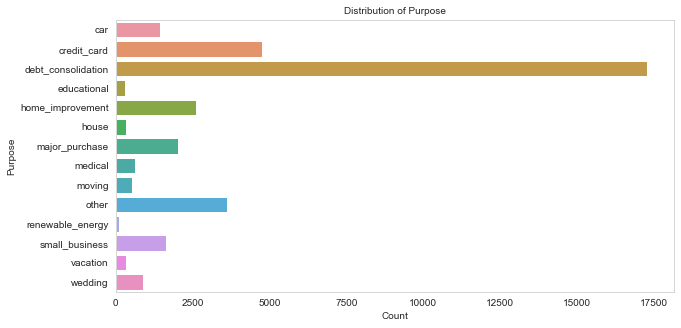

In [112]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=1)
plt.show()

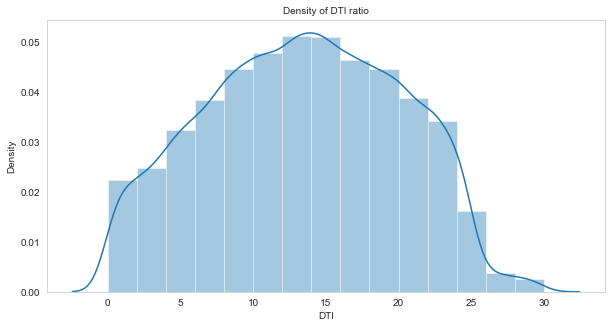

In [113]:
# Debt to Income
plt.figure(figsize=(10,5))
sns.distplot(loan.dti,kde=True,bins=15)
plt.xlabel('DTI')
plt.ylabel('Density')
plt.title('Density of DTI ratio',fontsize=10)
plt.show()

***Observation***: Majority of the have high debts to Income which is not a great sign

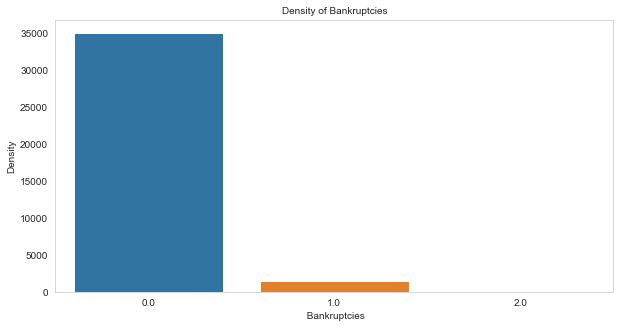

In [114]:
# pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan.pub_rec_bankruptcies)
plt.xlabel(' Bankruptcies')
plt.ylabel('Density')
plt.title('Density of Bankruptcies',fontsize=10)
plt.show()

***Observation***: Major lendees are not filed for bankruptcy

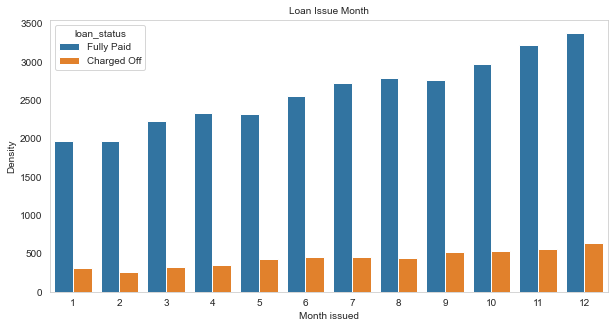

In [116]:
# issue_month
plt.figure(figsize=(10,5))
sns.countplot(loan.month,hue=loan.loan_status)
plt.xlabel('Month issued')
plt.ylabel('Density')
plt.title('Loan Issue Month',fontsize=10)
plt.show()

**Observation**: Majority of loans are taken in Q4.

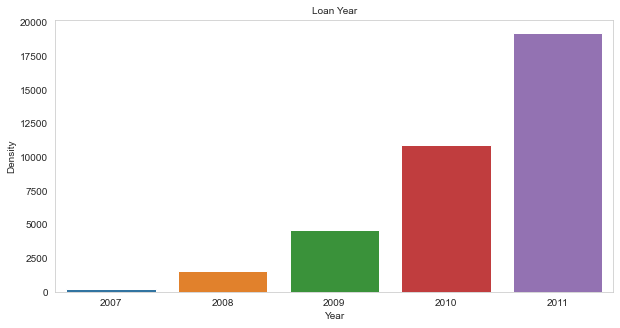

In [117]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan.year)
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Loan Year',fontsize=10)
plt.show()

***Observation***: loans approved increased gradually and rapidly in the later years

### Segmented Univariate Analysis

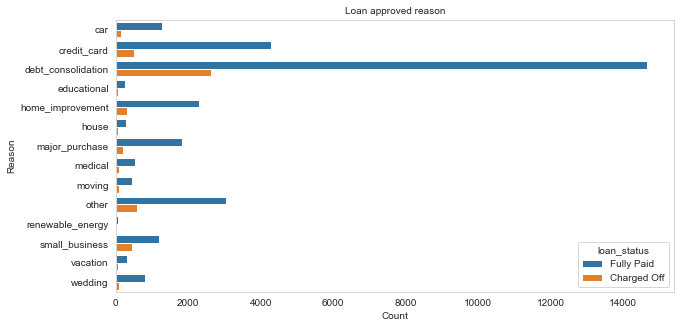

In [118]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.title('Loan approved reason',fontsize=10)
plt.show()

**Observation:** Debt Consolidation the main reason for loan where it is fully paid and defaulted

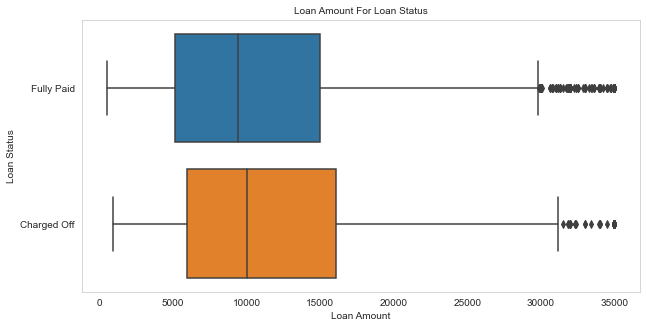

In [119]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Loan Amount For Loan Status',fontsize=10)
plt.show()

***Observation:*** Mean and 25% quartile are almost same where as 75% percentile is more for defaulted which shows the defaulting could occur 

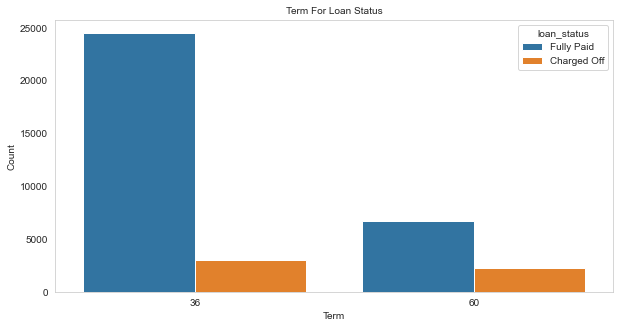

In [121]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term For Loan Status',fontsize=10)
plt.show()

***Observations:*** the 36 month tenure has high chances of being fully paid compared to 60 months

<AxesSubplot:xlabel='count', ylabel='term'>

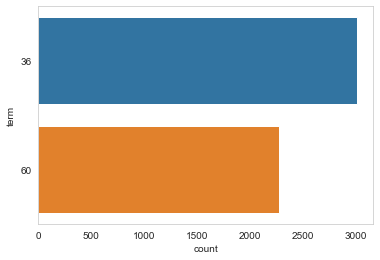

In [124]:
sns.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

Text(0, 0.5, 'Count')

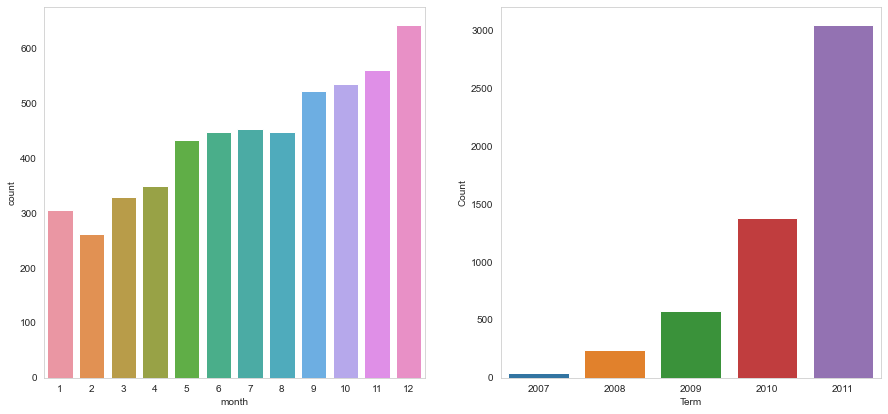

In [126]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='year', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Term')
plt.ylabel('Count')

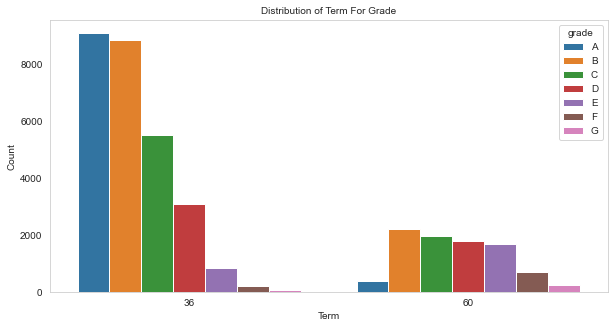

In [128]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=10)
plt.show()

***Observations:*** The loans in 36 month term majorily consist of grade A and B loans 

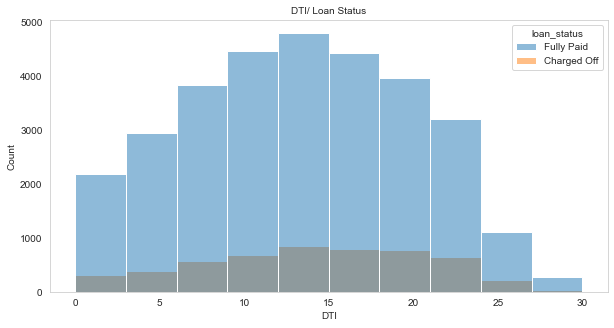

In [131]:
# Debt to Income 
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI/ Loan Status',fontsize=10)
plt.show()

***Observations:*** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher 

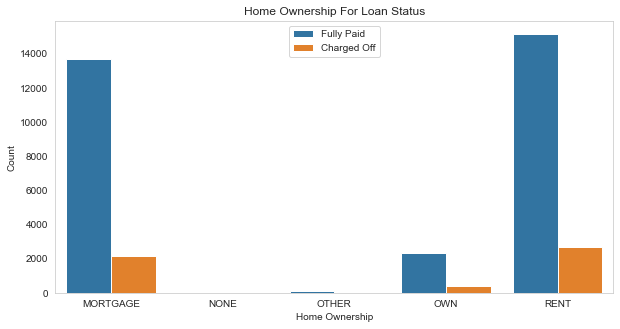

In [132]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

***Observations:*** own propoerty owners has less defaulter rate compared to others

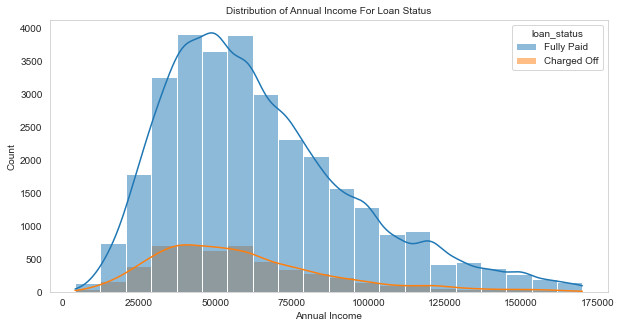

In [133]:
# annual_inc vs loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=10)
plt.show()

***Observations:*** Data shows that default rate is more in Lendees with less than 50000 annual income than the higher income holders

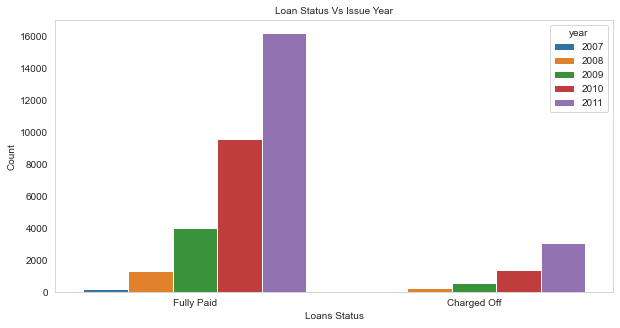

In [136]:
# loan_status vs issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='loan_status',hue='year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Loan Status Vs Issue Year',fontsize=10)
plt.show()

***Observations:*** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

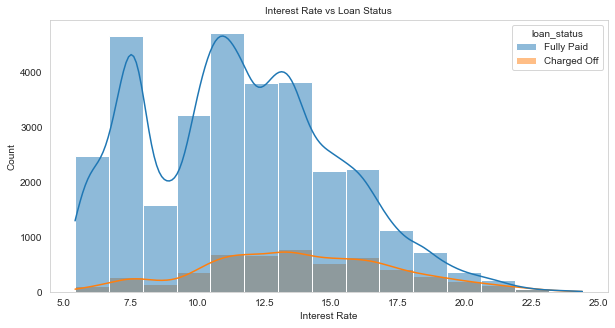

In [139]:
# int_amnt vs loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=15, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Interest Rate vs Loan Status',fontsize=10)
plt.show()

***Observations:*** defaulted loan is directly proportnal to interest rate

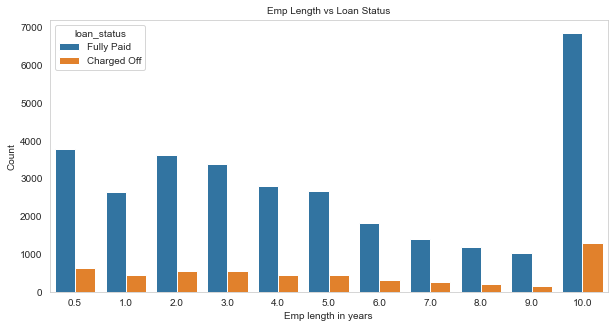

In [140]:
# emp_length vsloan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.xlabel('Emp length in years')
plt.ylabel('Count')
plt.title('Emp Length vs Loan Status',fontsize=10)
plt.show()

***Observations:*** The lendee with 10 or more years of experience are likely to default and have higher chance of fully paying the loan.but chances of fully paid is more

### Bivariate Analysis

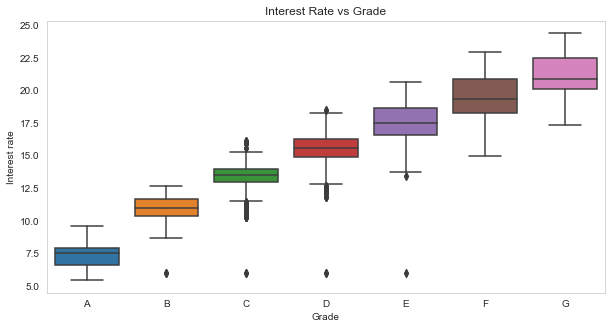

In [160]:
# interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan,x='grade',y='int_rate')
plt.xlabel('Grade')
plt.ylabel('Interest rate')
plt.title('Interest Rate vs Grade',fontsize=12)
plt.show()

***Observations:*** Grade = risk factor, the more interst rate increases with the risk.

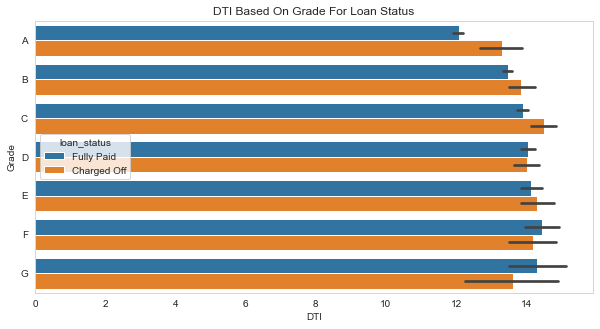

In [142]:
# DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

**Observations:** Grade A is lowest risk also has lowest DTI which means the higher the grade the lower rate of default.

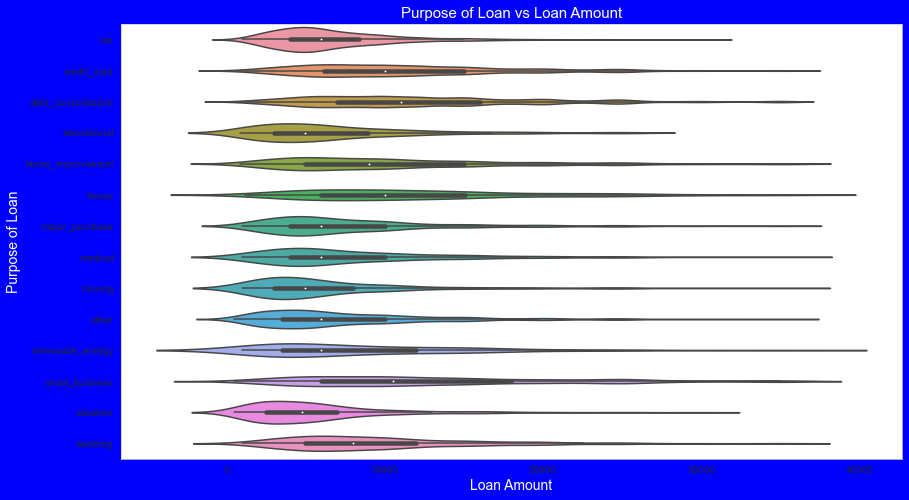

In [157]:
plt.figure(figsize=(14,8),facecolor='b')
ax=sns.violinplot(y='purpose', x='loan_amnt', data =loan)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

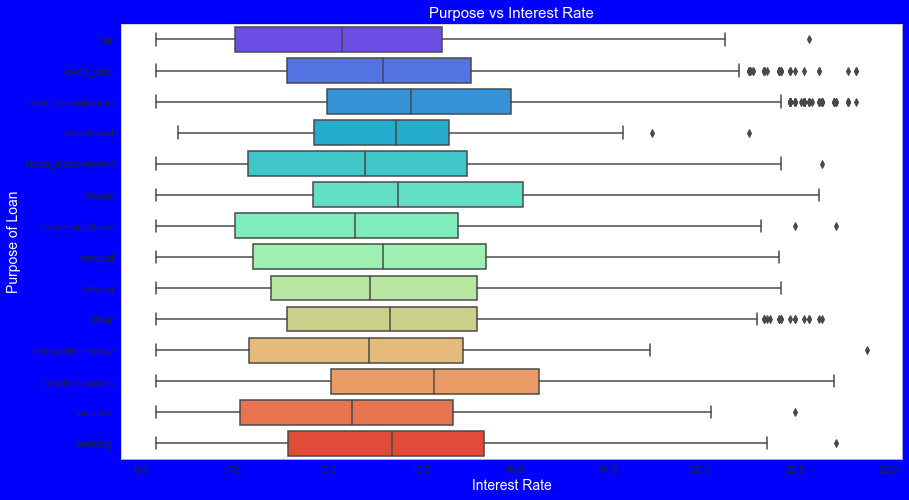

In [158]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8),facecolor='b')
ax = sns.boxplot(x='int_rate', y='purpose', data =loan,palette='rainbow')
ax.set_title('Purpose vs Interest Rate',fontsize=15,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color = 'w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.show()

**Observations:** Grade A is lowest risk also has lowest DTI which means the higher the grade the lower rate of default.

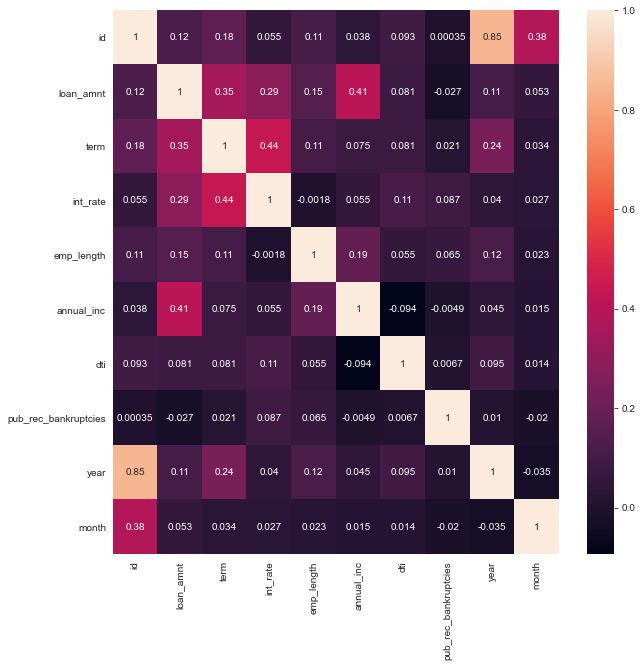

In [149]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),annot=True)
plt.show()

## Overall Observations 
### Univariate Analysis
 - Fully paid loans are 7 times to Defaulted loans
 - majority loans applied for 36 months than 60 months
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to others.
 - Majority of Lenddes have working experience more than 10 years.
 - Majority of Lendees are on Rent residency or on Mortagages with few having own houses.
 - About 50% of the Lendees are verified by the company or have source verified.
 - Annual Income is left skewed giving indication that majority is earning low annual income
 - A large % of loans are drawn for debt consolidation followed by credit card.
 - Majority of the lendees are from urban cities like california, new york, texas, florida etc.
 - Majority of the lendees have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the lendees have not filed for bankruptcy.
 - Majority of the loans are approved in Q4.
 - The number of loans approved increases with the time with recents times of data has seen exponential growth

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan than the defaulted loan.
 - The mean and quartiles are same for both fully paid and defaulted but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - loan term of 60 month has higher chance of defaulting than 36 month term
 - the 36 month term has higher chance of fully paid loan
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio
 - the loans in DTI ratio 10-15 have higher number, the higher dti the higher chance of defaulting.
 - The Defaulted loan are lower from lendees who own property compared to on mortgage/rent.
 - Lendees with less 50000 annual income are more likely to default than higher income lendees
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loans increases with increase in interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with more years(10+) of experience are likely to default and at same time fully paying the loan.

### Bivariate Analysis
 - The Grade is other term of risk factor thus it can be assumed that risk increases with interst rate.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Lendees not from large urban cities like california, new york, texas, florida etc. 
    2. Lendees having annual income in the range 50000-100000 or less.
    3. Lendees having Public Recorded Bankruptcy.
    4. Lendees with least grades like E,F,G which indicate high risk.
    5. Lendees with very high Debt to Income ratio.
    6. Lendees with working experience more than 10 yrs.